In [1]:
import sklearn.datasets
import matplotlib.pyplot as plt
import torch
import numpy as np
import random

def make_dataset(version=None, test=False):
    if test:
        random_state = None
    else:
        random_states = [27,33,38]
        if version is None:
            version = random.choice(range(len(random_states)))
        random_state = random_states[version]
    return sklearn.datasets.make_circles(factor=0.7, noise=0.1, random_state=random_state)

In [2]:
X_train_, y_train_ = make_dataset()
X_test_, y_test_ = make_dataset(test=True)
X_train, y_train = torch.Tensor(X_train_),torch.Tensor(y_train_)
X_test, y_test = torch.Tensor(X_test_),torch.Tensor(y_test_)

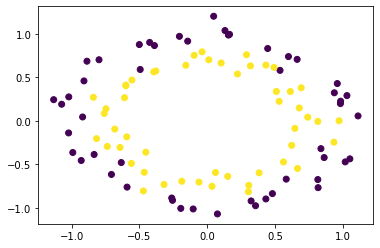

In [3]:
plt.scatter(X_train[:,1], X_train[:,0], c = y_train)

In [4]:
def LogisticRegression():
    return torch.nn.Sequential(
        torch.nn.Linear(2, 40, bias=True),
        torch.nn.ReLU(),
        torch.nn.Linear(40, 30, bias=True),
        torch.nn.ReLU(),
        torch.nn.Linear(30, 20, bias=True),
        torch.nn.ReLU(),
        torch.nn.Linear(20, 10, bias=True),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1, bias=True),
        torch.nn.Sigmoid(),
    )

In [5]:
def LogisticReg_NN(X_train, y_train, X_test, y_test):

    learning_rate = 0.0095
    acu = []
    model = LogisticRegression()
    criterion = torch.nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    for epoch in range(50000):
        optimizer.zero_grad() # Setting our stored gradients equal to zero
        outputs = model(X_train)
        loss = criterion(torch.squeeze(outputs), y_train) 
        loss.backward() # Computes the gradient of the given tensor w.r.t. the weights/bias
        optimizer.step() # Updates weights and biases with the optimizer (SGD)
    with torch.no_grad(): # Calculating the loss and accuracy for the test dataset
        total = y_train.size(0)
        correct = np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())
        accuracy = 100 * correct/total

        outputs_test = torch.squeeze(model(X_test)) #linear model 输出 0-1的值
        predicted_test = outputs_test.round().detach().numpy() #改回0, 1结果

        correct_test = np.sum(predicted_test == y_test.detach().numpy()) #我们预测的结果和y是否相符
        accuracy_test = 100 * correct_test/total #准确率
    return accuracy, accuracy_test, torch.squeeze(outputs).round().detach().numpy(), predicted_test, model

In [6]:
nn = LogisticReg_NN(X_train, y_train, X_test, y_test)
predicted_train = nn[2]
predicted_test = nn[3]
model = nn[4]

In [7]:
print(f'Accuracy of training dataset is {nn[0]},\nAccuracy of testing dataset is {nn[1]}')

Accuracy of training dataset is 100.0,
Accuracy of testing dataset is 89.0


# (a)Accuracy of the training dataset is 100.0, the accuracy of the testing dataset is 89.0. The training dataset has perfect results using this model, but the test dataset only has 89% accuracy. There might be problems with this model even though the performance is great.

Text(0.5, 0.98, 'This is a train dataset learning results')

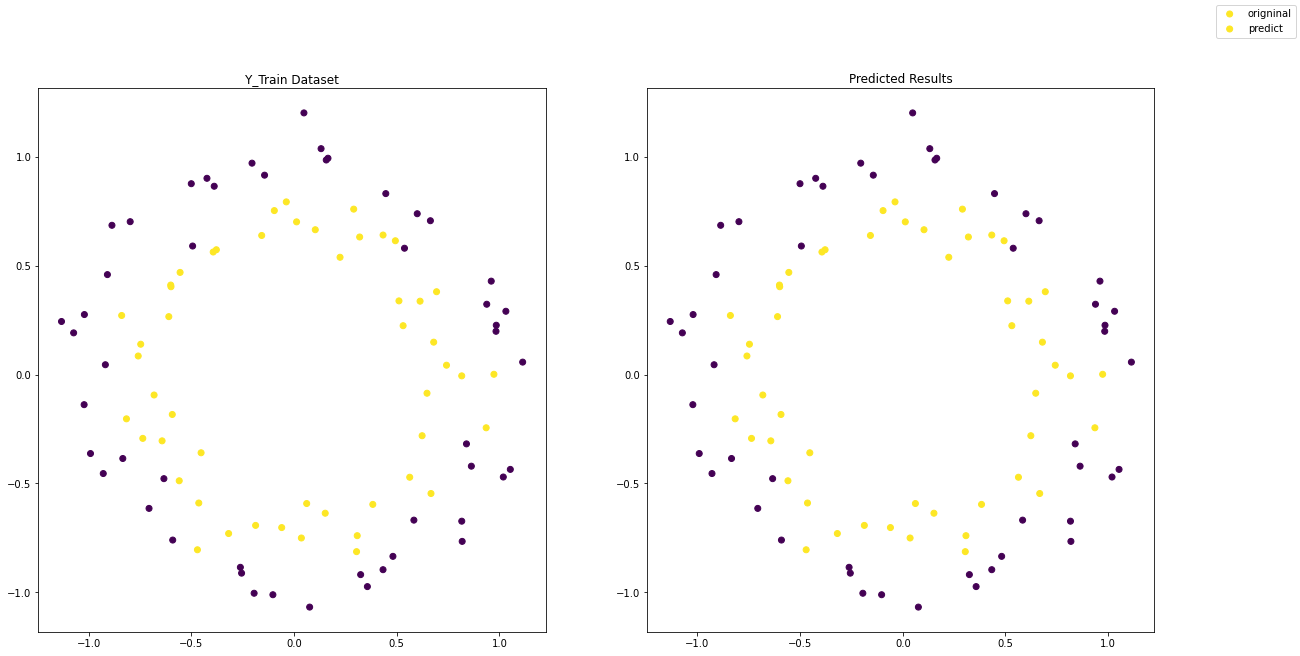

In [8]:
#For training dataset
same = [y_train_[i] for i in range(100) if y_train_[i] == predicted_train[i] ]
train,(original, predict) = plt.subplots(1, 2, figsize = (20,10))
original.scatter(X_train[:,1], X_train[:,0], label = 'origninal', c = y_train_)
predict.scatter(X_train[:,1], X_train[:,0], label = 'predict', c = predicted_train)
original.set_title('Y_Train Dataset')
predict.set_title('Predicted Results')
train.legend()
train.suptitle('This is a train dataset learning results', fontsize=26, c='w')

Text(0.5, 0.98, 'This is a test dataset learning results')

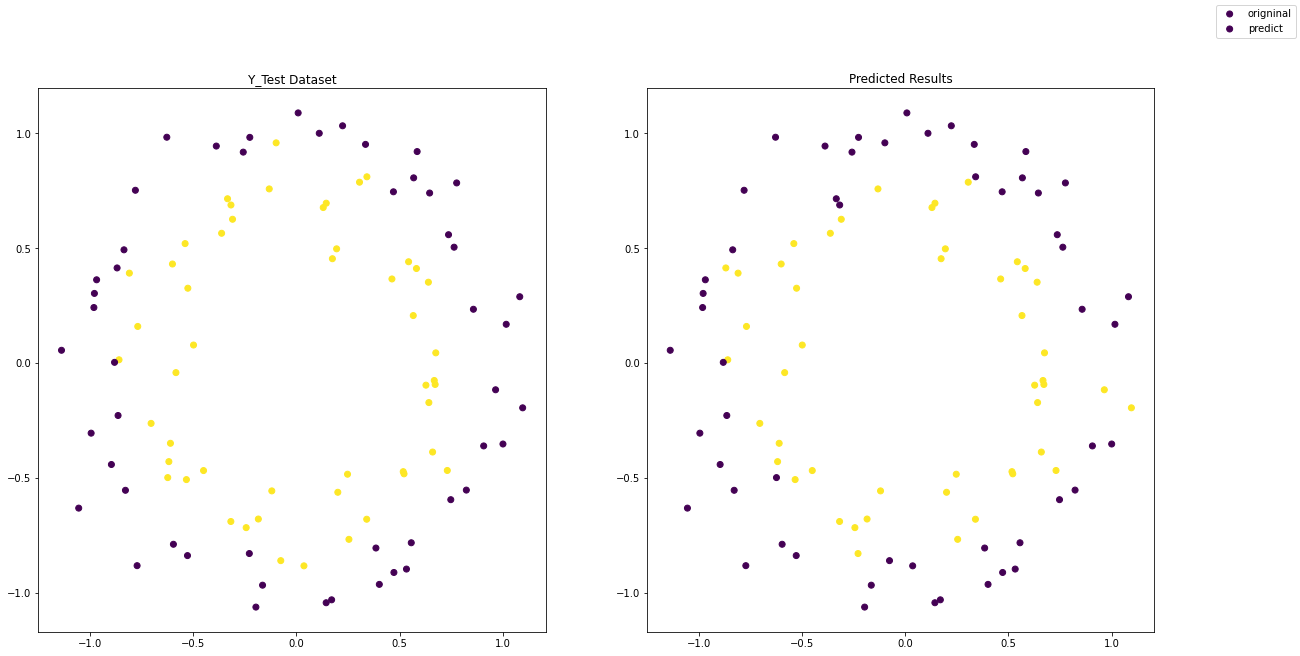

In [9]:
#For training dataset
same = [y_test_[i] for i in range(100) if y_test_[i] == predicted_test[i] ]
test,(original, predict) = plt.subplots(1, 2, figsize = (20,10))
original.scatter(X_test[:,1], X_test[:,0], label = 'origninal', c = y_test_)
predict.scatter(X_test[:,1], X_test[:,0], label = 'predict', c = predicted_test)
original.set_title('Y_Test Dataset')
predict.set_title('Predicted Results')
test.legend()
test.suptitle('This is a test dataset learning results', fontsize=26, c='w')

# (b)They are separately plotted, it's obvious that most of them are correctly classified, only a few of them have wrong colors in comparison with the true results.

In [10]:
x1, x2 = X_train[:,0], X_train[:,1]
x1_min, x1_max = x1.min() - 1, x1.max() + 1
x2_min, x2_max = x2.min() - 1, x2.max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 1000), np.linspace(x2_min, x2_max, 1000))
boundary_data = torch.from_numpy(np.c_[xx1.ravel(), xx2.ravel()]).to(torch.float32)
boundary_result = np.array([])
for i in boundary_data:
    net_out = model(i).data
    boundary_result = np.append(boundary_result, net_out.item())
boundary_result = boundary_result.reshape(xx1.shape)

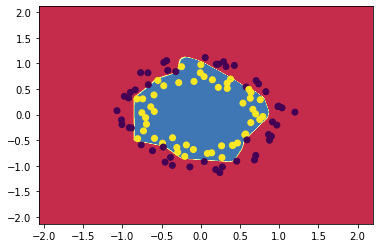

In [20]:
plt.contourf(xx1, xx2, boundary_result, cmap = plt.cm.Spectral)
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)

In [34]:
def revised_LogisticReg_NN(X_train, y_train, X_test, y_test):

    learning_rate = 0.0095
    model = LogisticRegression()
    criterion = torch.nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    for _ in range(20000):
        optimizer.zero_grad() # Setting our stored gradients equal to zero
        outputs = model(X_train)
        loss = criterion(torch.squeeze(outputs), y_train) 
        loss.backward() # Computes the gradient of the given tensor w.r.t. the weights/bias
        optimizer.step() # Updates weights and biases with the optimizer (SGD)
        X_train_, y_train_ = make_dataset()
        X_train, y_train = torch.Tensor(X_train_),torch.Tensor(y_train_)

    with torch.no_grad(): # Calculating the loss and accuracy for the test dataset
        total = y_train.size(0)
        correct = np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())
        accuracy = 100 * correct/total

        outputs_test = torch.squeeze(model(X_test)) #linear model 输出 0-1的值
        predicted_test = outputs_test.round().detach().numpy() #改回0, 1结果

        correct_test = np.sum(predicted_test == y_test.detach().numpy()) #我们预测的结果和y是否相符
        accuracy_test = 100 * correct_test/total #准确率
        
    return accuracy, accuracy_test

In [35]:
nn = revised_LogisticReg_NN(X_train, y_train, X_test, y_test)

In [36]:
print(f'Accuracy of training dataset is {nn[0]},\nAccuracy of testing dataset is {nn[1]}')

Accuracy of training dataset is 49.0,
Accuracy of testing dataset is 91.0



# (d) The original neural network has problems with overfitting. After using the first dataset to train this model, I changed the training dataset to a new one every time. Here I set epoch as 20000 times, I got an accuracy of training dataset 49.0 and accuracy of testing dataset 91.0. This shows a better effect of the model I trained using the training dataset.